## class-10-flexible-session-gilbert-zhang

In [156]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [157]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'auto-mpg.csv'))

df = read_dataset()

In [158]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [159]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [160]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()

In [161]:
test_df = df.drop(train_df.index)

In [162]:
train_df[train_df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [163]:
train_df = train_df.dropna()

In [164]:
train_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage


In [165]:
train_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.785480,-0.806356,-0.769034,-0.823968,0.443205,0.566644,0.567607
cylinders,-0.785480,1.000000,0.952013,0.852893,0.900416,-0.547613,-0.333138,-0.553137
displacement,-0.806356,0.952013,1.000000,0.904732,0.932488,-0.578571,-0.352108,-0.608434
horsepower,-0.769034,0.852893,0.904732,1.000000,0.856757,-0.715311,-0.396199,-0.466080
weight,-0.823968,0.900416,0.932488,0.856757,1.000000,-0.450016,-0.288988,-0.574387
acceleration,0.443205,-0.547613,-0.578571,-0.715311,-0.450016,1.000000,0.257781,0.281345
model_year,0.566644,-0.333138,-0.352108,-0.396199,-0.288988,0.257781,1.000000,0.163702
origin,0.567607,-0.553137,-0.608434,-0.466080,-0.574387,0.281345,0.163702,1.000000


In [166]:
train_df.origin.value_counts()

1    153
3     48
2     34
Name: origin, dtype: int64

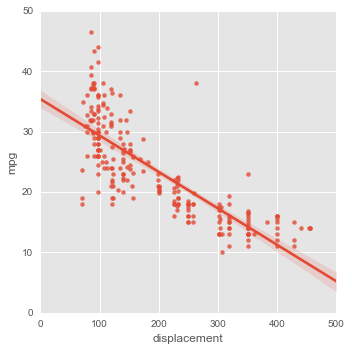

In [167]:
sns.lmplot(x = 'displacement', y = 'mpg', data = train_df)

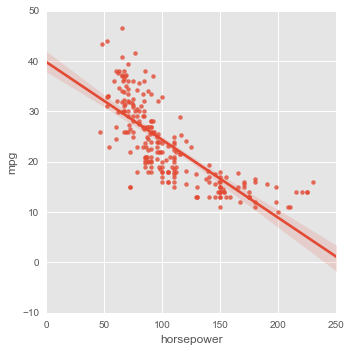

In [168]:
sns.lmplot(x = 'horsepower', y = 'mpg', data = train_df)

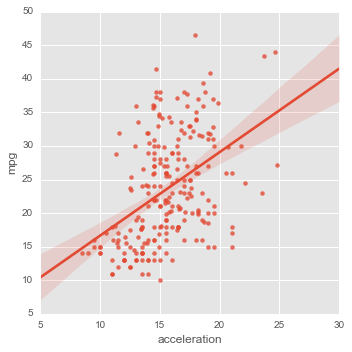

In [169]:
sns.lmplot(x = 'acceleration', y = 'mpg', data = train_df)

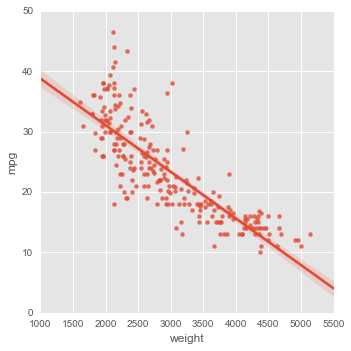

In [170]:
sns.lmplot(x = 'weight', y = 'mpg', data = train_df)

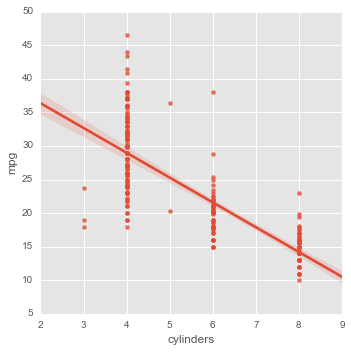

In [171]:
sns.lmplot(x = 'cylinders', y = 'mpg', data = train_df)

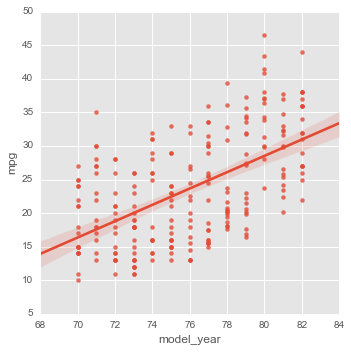

In [172]:
sns.lmplot(x = 'model_year', y = 'mpg', data = train_df)

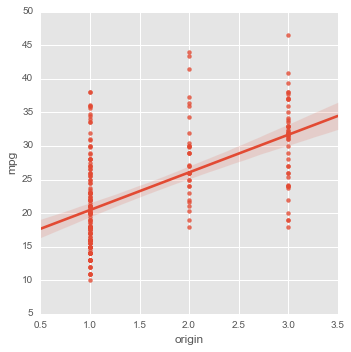

In [173]:
sns.lmplot(x = 'origin', y = 'mpg', data = train_df)

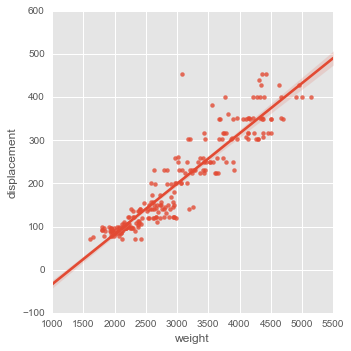

In [174]:
sns.lmplot(x = 'weight', y = 'displacement', data = train_df)

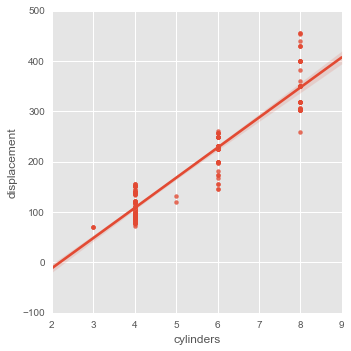

In [175]:
sns.lmplot(x = 'cylinders', y = 'displacement', data = train_df)

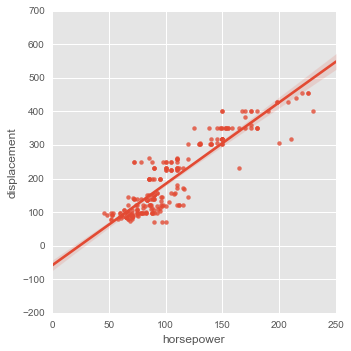

In [176]:
sns.lmplot(x = 'horsepower', y = 'displacement', data = train_df)

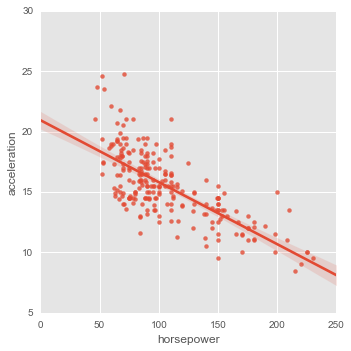

In [177]:
sns.lmplot(x = 'horsepower', y = 'acceleration', data = train_df)

## Transformation

In [178]:
train_df['gpm'] = 1/df.mpg

In [179]:
train_df['gpm']

1      0.066667
2      0.055556
4      0.058824
5      0.066667
6      0.071429
         ...   
392    0.037037
393    0.037037
394    0.022727
395    0.031250
397    0.032258
Name: gpm, dtype: float64

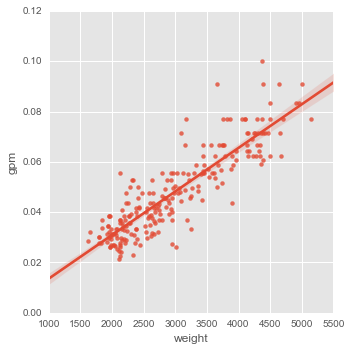

In [180]:
sns.lmplot(x = 'weight', y = 'gpm', data = train_df)

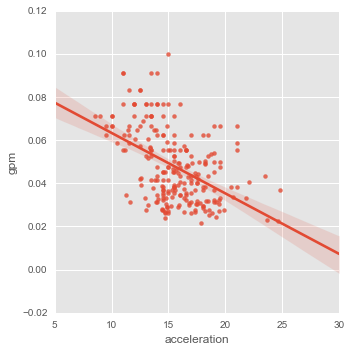

In [181]:
sns.lmplot(x = 'acceleration', y = 'gpm', data = train_df)

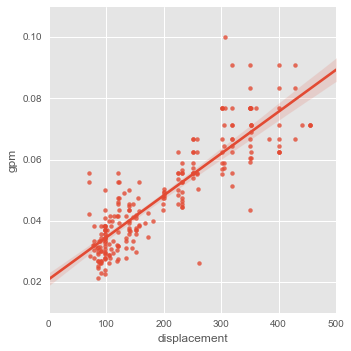

In [182]:
sns.lmplot(x = 'displacement', y = 'gpm', data = train_df)

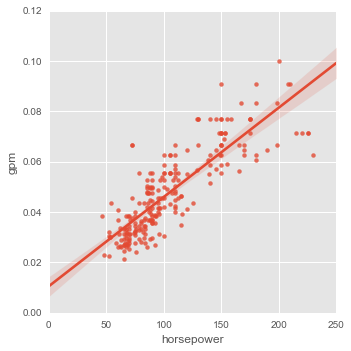

In [183]:
sns.lmplot(x = 'horsepower', y = 'gpm', data = train_df)

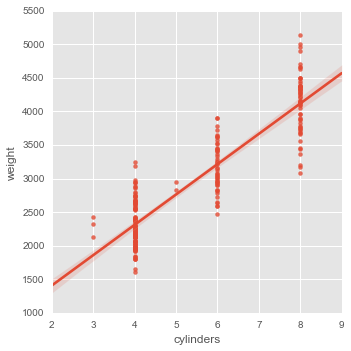

In [194]:
sns.lmplot(x = 'cylinders', y = 'weight', data = train_df)

In [155]:
train_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpgsqur,gpm
mpg,1.000000,-0.785480,-0.806356,-0.769034,-0.823968,0.443205,0.566644,0.567607,0.986086,-0.940396
cylinders,-0.785480,1.000000,0.952013,0.852893,0.900416,-0.547613,-0.333138,-0.553137,-0.712014,0.852662
displacement,-0.806356,0.952013,1.000000,0.904732,0.932488,-0.578571,-0.352108,-0.608434,-0.734587,0.871342
horsepower,-0.769034,0.852893,0.904732,1.000000,0.856757,-0.715311,-0.396199,-0.466080,-0.703692,0.840555
weight,-0.823968,0.900416,0.932488,0.856757,1.000000,-0.450016,-0.288988,-0.574387,-0.756075,0.881773
acceleration,0.443205,-0.547613,-0.578571,-0.715311,-0.450016,1.000000,0.257781,0.281345,0.415222,-0.476400
model_year,0.566644,-0.333138,-0.352108,-0.396199,-0.288988,0.257781,1.000000,0.163702,0.559753,-0.537159
origin,0.567607,-0.553137,-0.608434,-0.466080,-0.574387,0.281345,0.163702,1.000000,0.554336,-0.533189
mpgsqur,0.986086,-0.712014,-0.734587,-0.703692,-0.756075,0.415222,0.559753,0.554336,1.000000,-0.875056
gpm,-0.940396,0.852662,0.871342,0.840555,0.881773,-0.476400,-0.537159,-0.533189,-0.875056,1.000000


In [195]:
train_df.corr().gpm

mpg            -0.940396
cylinders       0.852662
displacement    0.871342
horsepower      0.840555
weight          0.881773
acceleration   -0.476400
model_year     -0.537159
origin         -0.533189
gpm             1.000000
Name: gpm, dtype: float64

## Modeling

In [187]:
model = smf.ols(formula = ' gpm  ~ weight', data = train_df).fit()

In [188]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     814.3
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           5.38e-78
Time:                        20:58:21   Log-Likelihood:                 803.91
No. Observations:                 235   AIC:                            -1604.
Df Residuals:                     233   BIC:                            -1597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0038      0.002     -1.998      0.047        -0.007  -5.2e-05
weight      1.734e-05   6.08e-07     28.536      0.000      1.61e-05  1.85e-05
==============================================================================
Omnibus:                       25.625   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.535
Skew:                           0.606   Prob(JB):                     2.13e-10
Kurtosis:                       4.755   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

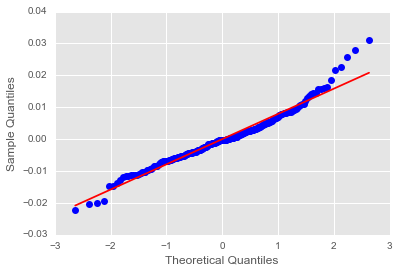

In [189]:
sm.qqplot(model.resid, line = 's')
pass

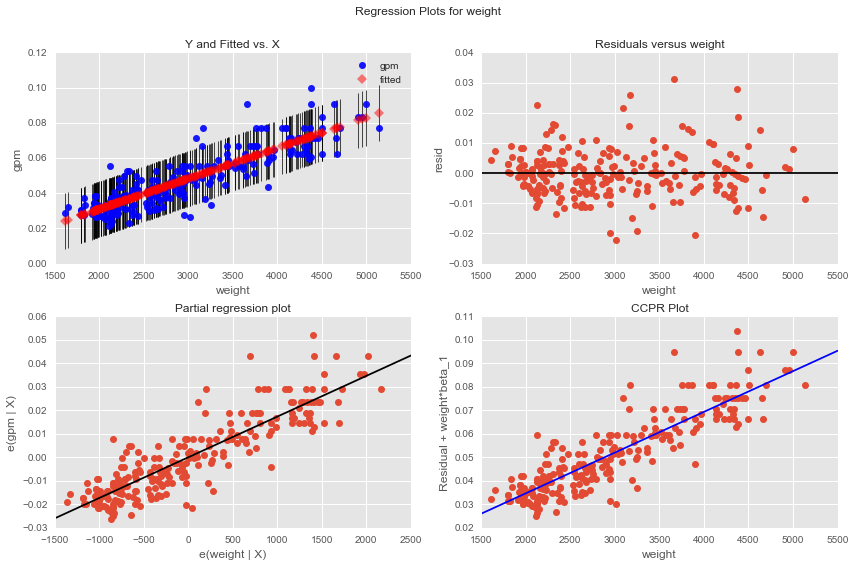

In [192]:
sm.graphics.plot_regress_exog(model, 'weight', fig = plt.figure(figsize = (12, 8)))
pass